# Exemplo de reamostragem das partículas

In [31]:
import numpy as np

import projeto_pf # Seu trabalho vai aqui
import inspercles
from pf import draw_random_sample

import sys
if (sys.version_info > (3, 0)):
    import importlib
    importlib.reload(projeto_pf) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    reload(projeto_pf)

%matplotlib inline



## Criação das partículas e do robô

In [32]:

particulas = projeto_pf.cria_particulas()
robot = projeto_pf.robot

    
    
    
    

## Mapa com posição inicial

Este desenho é só ilustrativo, você não vai precisar chamar o código de desenho no projeto. Somente precisa criar as funções adequadas em `projeto_pf.py`.

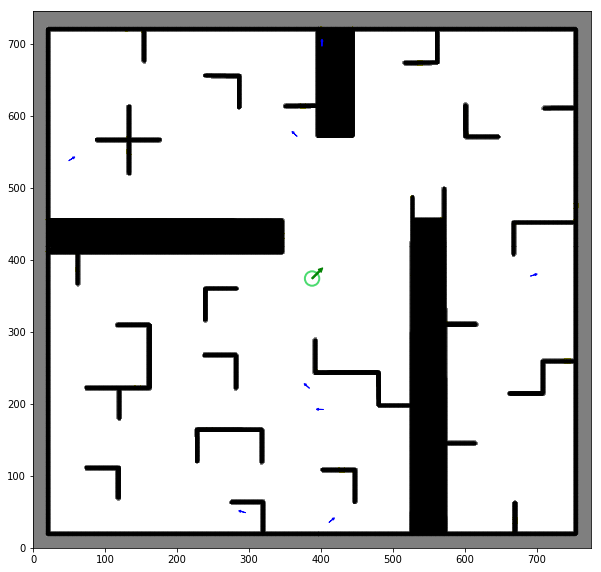

In [33]:
inspercles.nb_draw_map(inspercles.color_image, particles = particulas, pose=robot.pose(), robot=True)

Vamos tornar a distribuição de probabilidade nas partículas bem desequilibrada para observarmos a reamostragem

In [34]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [35]:
# Vamos separar a informação de posição das partículas para que possamos "ver"  as partículas
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]

particulas_pesos = [np.round(p.w, decimals=3) for p in particulas]

In [36]:
particulas_exp

[[403.30795993299216, 192.1051983277157, 204.1722528997409],
 [383.9095775694478, 221.5111167415409, 146.9319502390889],
 [49.528281298183174, 537.6195526105864, 126.22793727167615],
 [-129.86055872366705, 262.94686973156877, 129.16858592610544],
 [690.6879968795112, 377.34648972380677, 12.867304727152593],
 [295.13558488082873, 48.77451248832408, 291.8948699474275],
 [1102.6714813115154, 199.7047709730884, 178.69200797581672],
 [401.201529794825, 696.4715385604256, 114.65912758470755],
 [410.95685071888164, 35.231121509856116, 321.1401103697785],
 [366.75394619254837, 571.3900352097293, 165.74369175920617]]

Vejam como está a distribuição dos pesos

In [37]:
particulas_pesos

[0.8, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022]

## Fazendo a reamostragem

Vamos criar novas partículas reamostrando usando a função `pf.draw_random_sample`

In [38]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)
novas_particulas

A probabilidade que está em peso agora o sentido. Precisamos fazer com que todos os pesos novamente virem w=1  (ou $1/n$ como na folha de papel, tanto faz desde que todas fiquem iguais)

In [39]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

## Depois da reamostragem

Vamos observar os valores das partículas

In [40]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


**<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>**

In [41]:
valores_novas_particulas

[[383.9095775694478, 221.5111167415409, 146.9319502390889],
 [403.30795993299216, 192.1051983277157, 204.1722528997409],
 [403.30795993299216, 192.1051983277157, 204.1722528997409],
 [403.30795993299216, 192.1051983277157, 204.1722528997409],
 [403.30795993299216, 192.1051983277157, 204.1722528997409],
 [403.30795993299216, 192.1051983277157, 204.1722528997409],
 [690.6879968795112, 377.34648972380677, 12.867304727152593],
 [403.30795993299216, 192.1051983277157, 204.1722528997409],
 [403.30795993299216, 192.1051983277157, 204.1722528997409],
 [403.30795993299216, 192.1051983277157, 204.1722528997409]]

![](animated.gif)